### TRANSFORMADA DE HILBERT HUANG

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, stft
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_6000\P01\mano abierta.xlsx")
df

,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8
0,0.031250,-0.335938,-0.195312,-0.031250,0.078125,0.031250,0.078125,0.007812
1,-0.117188,0.304688,0.453125,0.140625,-0.070312,-0.007812,0.015625,-0.054688
2,-0.101562,-0.320312,-0.117188,0.109375,0.125000,0.023438,-0.015625,0.007812
3,-0.359375,-0.132812,-0.570312,-0.273438,-0.093750,-0.078125,-0.085938,-0.062500
4,0.281250,0.187500,0.570312,0.289062,0.101562,0.031250,0.031250,-0.093750
...,...,...,...,...,...,...,...,...
5995,0.007812,-0.031250,-0.023438,-0.031250,-0.109375,-0.109375,-0.093750,-0.062500
5996,0.007812,0.039062,0.007812,0.000000,0.078125,0.164062,0.101562,-0.007812
5997,0.000000,0.000000,-0.007812,-0.015625,-0.101562,-0.156250,0.039062,0.031250
5998,0.007812,0.023438,0.000000,0.023438,-0.046875,0.023438,0.046875,-0.039062


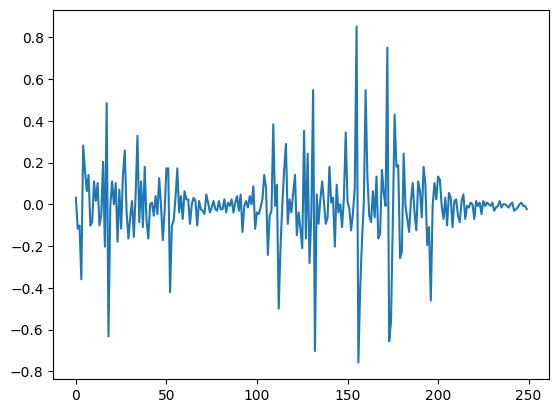

In [35]:
data1=df.iloc[:,0]
data2=data1[0:250]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data2, color='tab:blue')
plt.show()

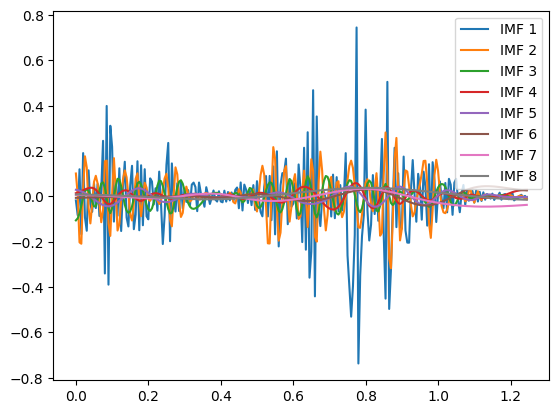

In [37]:
from pyhht import EmpiricalModeDecomposition
import matplotlib.pyplot as plt
from scipy.signal import hilbert


# Set sampling frequency and time vector
fs = 200
t = np.arange(0, len(data2)/fs, 1/fs)

# Create instance of EmpiricalModeDecomposition class
decomposer = EmpiricalModeDecomposition(data2)

# Perform Empirical Mode Decomposition (EMD) on signal
imfs = decomposer.decompose()

# Plot each IMF separately
for i, imf in enumerate(imfs):
    plt.plot(t, imf, label=f'IMF {i+1}')

plt.legend()
plt.show()

"""
# Calculate Hilbert-Huang Transform (HHT) of each IMF
for i, imf in enumerate(imfs):
    # Calculate analytic signal using Hilbert transform
    analytic_signal = hilbert(imf)
    # Calculate instantaneous frequency and amplitude
    inst_freq = np.angle(analytic_signal[1:]/analytic_signal[:-1])/(2*np.pi*fs)
    inst_ampl = np.abs(analytic_signal)
    # Plot instantaneous frequency and amplitude
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(t[:-1], inst_freq)
    plt.title(f'Instantaneous Frequency of IMF {i+1}')
    plt.subplot(2,1,2)
    plt.plot(t, inst_ampl)
    plt.title(f'Instantaneous Amplitude of IMF {i+1}')
    plt.tight_layout()

plt.show()
"""

# HILBERT HUANG TRANSFORM - IMF

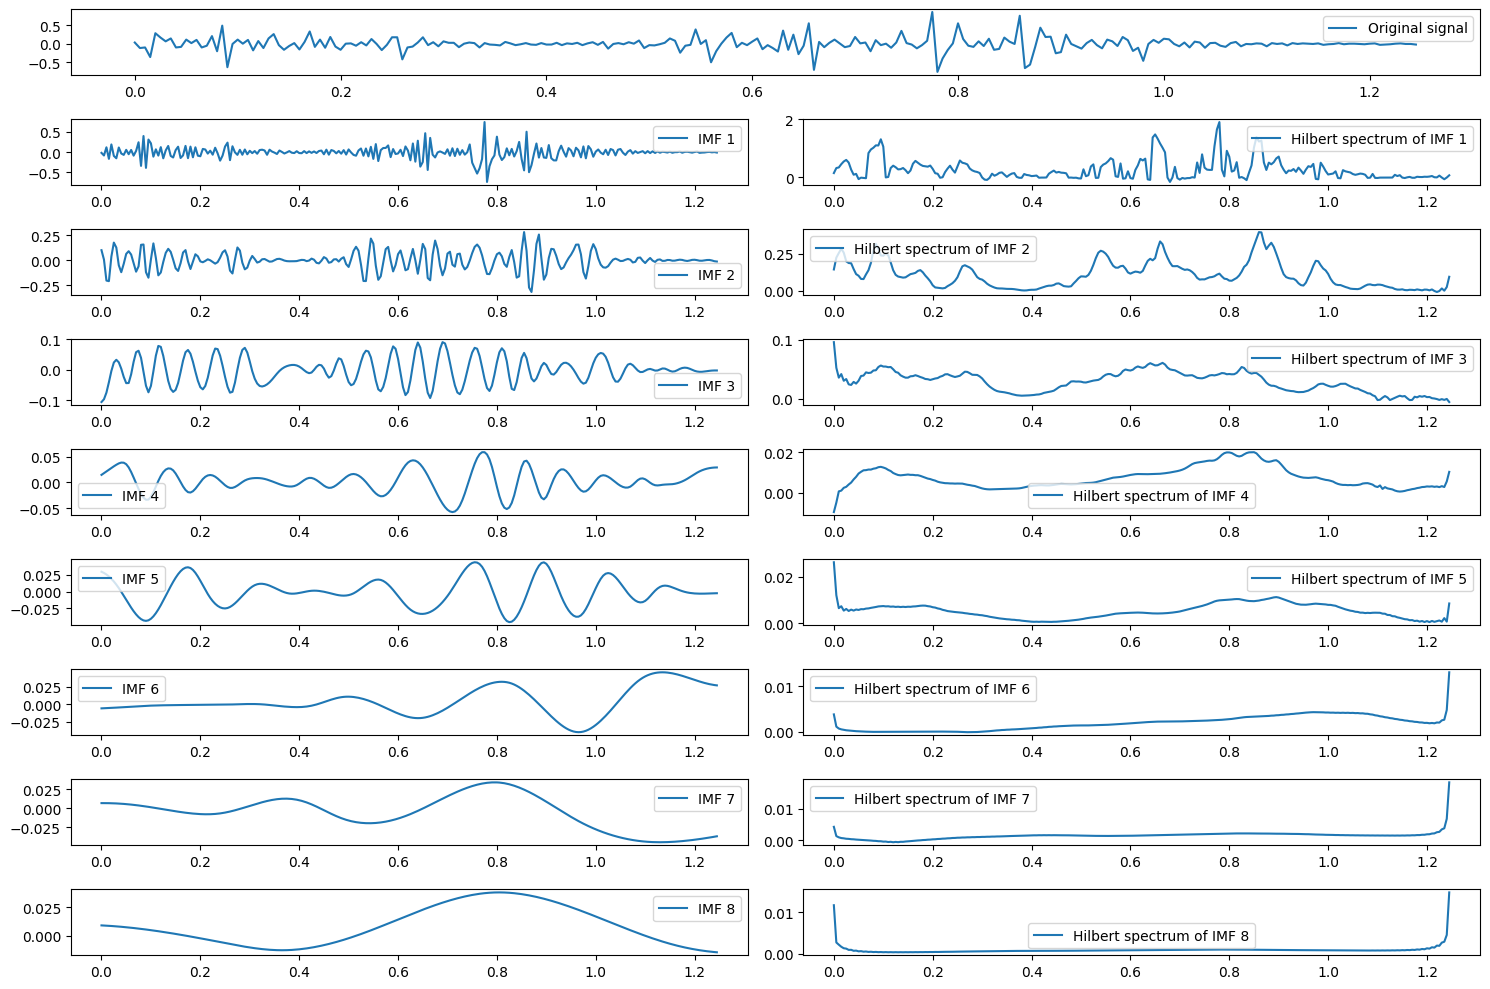

In [51]:
from pyhht import EmpiricalModeDecomposition
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# Set sampling frequency and time vector
fs = 200
t = np.arange(0, len(data2)/fs, 1/fs)

# Create instance of EmpiricalModeDecomposition class
decomposer = EmpiricalModeDecomposition(data2)

# Perform Empirical Mode Decomposition (EMD) on signal
imfs = decomposer.decompose()

# Calculate Hilbert-Huang Transform (HHT) of each IMF
hht_imfs = []
for i, imf in enumerate(imfs):
    # Calculate analytic signal using Hilbert transform
    analytic_signal = hilbert(imf)
    # Extract the instantaneous phase
    inst_phase = np.unwrap(np.angle(analytic_signal))
    # Calculate the Hilbert spectrum
    hilbert_spectrum = np.abs(analytic_signal) * np.gradient(inst_phase)
    # Append the Hilbert spectrum to the list of HHT IMFs
    hht_imfs.append(hilbert_spectrum)

# Plot the original signal and its decomposition into IMFs
plt.figure(figsize=(15,10))
plt.subplot(len(imfs)+1,1,1)
plt.plot(t, data2, label='Original signal')
plt.legend()

for i, imf in enumerate(imfs):
    plt.subplot(len(imfs)+1,2,i*2+3)
    plt.plot(t, imf, label=f'IMF {i+1}')
    plt.legend()

# Plot Hilbert spectrum of each IMF separately
for i, hht_imf in enumerate(hht_imfs):
    plt.subplot(len(imfs)+1,2,i*2+4)
    plt.plot(t, hht_imf, label=f'Hilbert spectrum of IMF {i+1}')
    plt.legend()



# Ajustar los espacios entre los subplots para evitar superposición de labels
plt.tight_layout()

# Mostrar la figura
plt.show()


# DENDISDAD ESPECTRAL DE POTENCIA DE CADA IMF - HHT

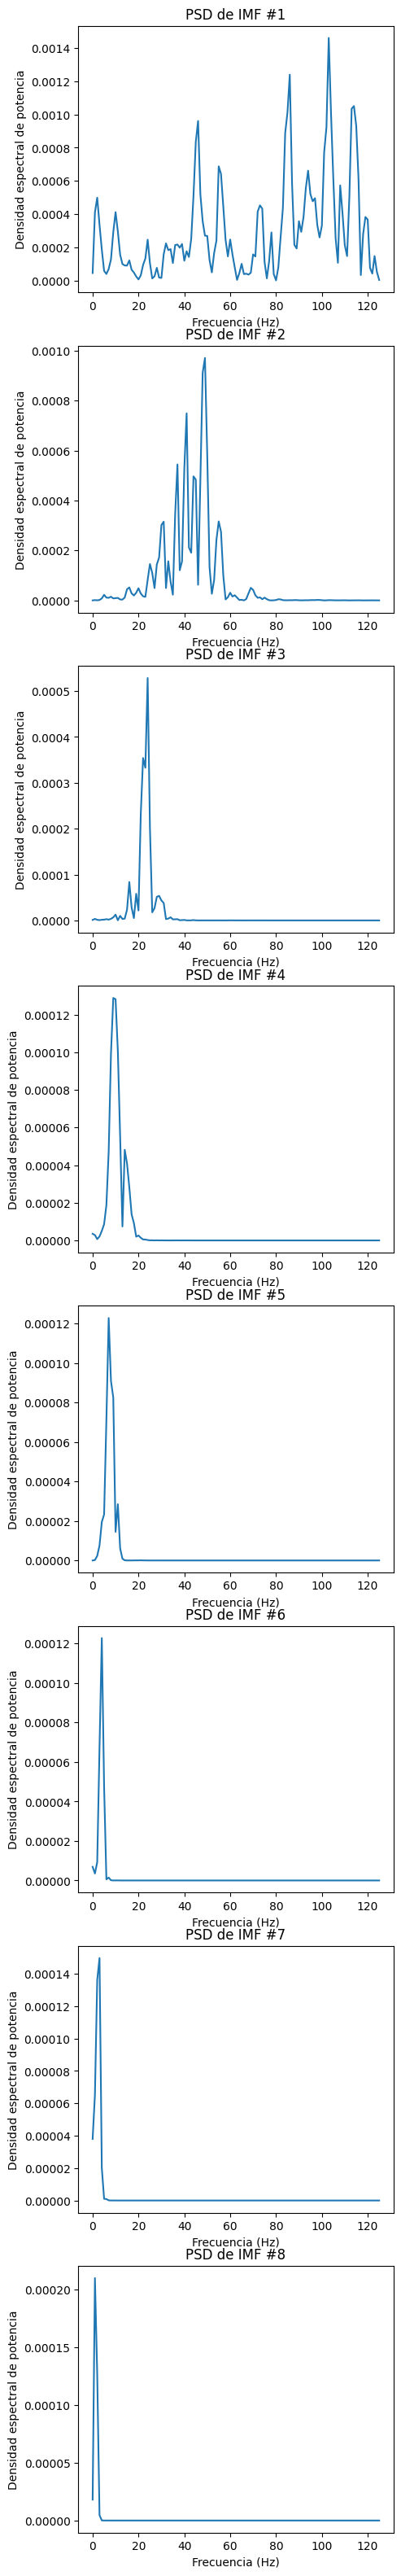

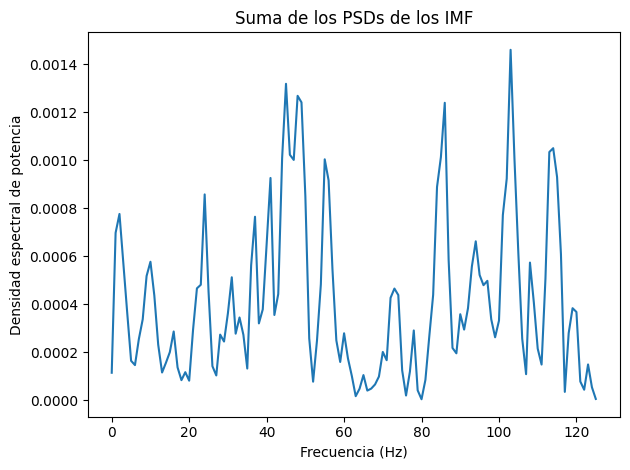

In [50]:
import numpy as np
from scipy.signal import welch
import pyhht
import matplotlib.pyplot as plt

# Genera una señal de prueba
fs = 250 # frecuencia de muestreo
t = np.arange(0, 1, 1/fs) # vector de tiempo
signal = data2

# Aplica la transformada de Hilbert-Huang
decomposer = pyhht.EMD(signal)
imfs = decomposer.decompose()

# Crea subplots para mostrar los PSD y los IMF lado a lado
fig, axs = plt.subplots(len(imfs), 1, figsize=(5, 5*len(imfs)))

# Calcula la PSD de cada IMF y grafica los resultados
psds = []
for i, imf in enumerate(imfs):
    imf = imf.ravel()
    f, psd = welch(imf, fs=fs, nperseg=fs*2)
    psds.append(psd)

    # Grafica la PSD de cada IMF en su subplot correspondiente
    axs[i].plot(f, psd)
    axs[i].set_title("PSD de IMF #" + str(i+1))
    axs[i].set_xlabel('Frecuencia (Hz)')
    axs[i].set_ylabel('Densidad espectral de potencia')

# Suma las PSDs de todos los IMF para obtener la PSD final
psd = np.sum(psds, axis=0)

# Grafica la PSD final
plt.figure()
plt.plot(f, psd)
plt.title('Suma de los PSDs de los IMF')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')

# Ajustar los espacios entre los subplots para evitar superposición de labels
plt.tight_layout()

# Mostrar la figura
plt.show()
